In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def SIR_base(N, i0, T, B, r, dt):

  BN = B/N
  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  tI = 0 * t_arr
  S[0] = N-i0
  R[0] = 0
  I[0] = i0
  tI[0] = i0
  for i in range(1, len(t_arr)):
    S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
    I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - r * I[i-1] * dt
    tI[i] = BN * S[i-1] * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1]*dt

  return S, I, tI, R, t_arr

In [ ]:
def SIR_vaccinated(N, i0, T, B, r, v_ratio, dt):

  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  tI = 0 * t_arr

  S[0] = N - i0 - N*v_ratio
  BN = B/N
  R[0] = 0
  I[0] = N*v_ratio
  tI[0] = I[0]

  for i in range(1, len(t_arr)):
    S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
    I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - r * I[i-1] * dt
    tI[i] = BN * S[i-1] * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1] * dt
    
  return S, I, tI, R, t_arr

In [ ]:
def total_infected(I):
  total = 0;
  for i in range(0, len(I)):
    total = total + I[i]

  # print('Total Infected = ', total)

  return total

In [ ]:
def peakIndex(I, dt):

  return I.tolist().index(max(I))*dt

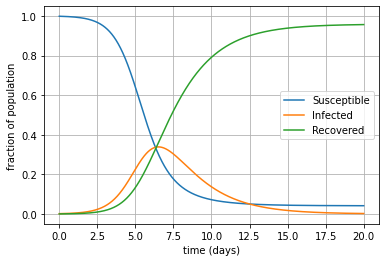

In [ ]:
# BASE CASE
N = 763
i0 = 1
T = 20
r = 0.5
B = 0.00218
dt = 0.001

S, I, tI, R, t_arr = SIR_base(N, i0, T, B*N, r, dt)
plt.plot(t_arr, S/N)
plt.plot(t_arr, I/N)
plt.plot(t_arr, R/N)

plt.xlabel('time (days)')
plt.ylabel('fraction of population')
plt.legend(['Susceptible', 'Infected', 'Recovered'])
plt.grid()

plt.savefig('base.png')

### Problem - A

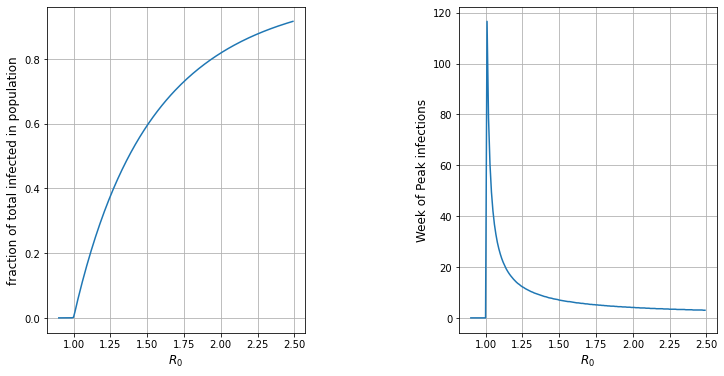

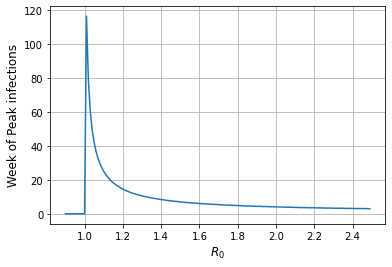

In [ ]:
N = 1000000
i0 = 3
T = 200
r = 3.5170
dt = 0.1
R0 = np.arange(0.9, 2.5, 0.01)
total = []
maxIndex = []


for r0 in R0:
  S, I, tI, R, t_arr = SIR_base(N, i0, T, (float)(r0 * r), r, dt)
  total.append(total_infected(tI))
  maxIndex.append(peakIndex(I, dt))

fig, ax = plt.subplots(1, 2, figsize = (12 , 6))
fig.subplots_adjust(wspace=0.6)

ax[0].plot(R0, np.array(total)/N)
ax[0].set_xlabel('$R_0$', fontsize = 12)
ax[0].set_ylabel('fraction of total infected in population', fontsize = 12)
ax[0].grid()

ax[1].plot(R0, maxIndex)
ax[1].set_xlabel('$R_0$', fontsize = 12)
ax[1].set_ylabel('Week of Peak infections', fontsize = 12)
ax[1].grid()

# fig.savefig('R0.png')

fig.show()

plt.figure()
plt.plot(R0, maxIndex)
plt.xlabel('$R_0$', fontsize = 12)
plt.ylabel('Week of Peak infections', fontsize = 12)
plt.grid()
plt.savefig('R0.png')

### Problem - B

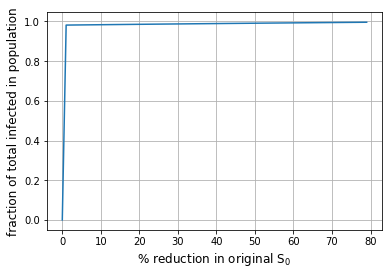

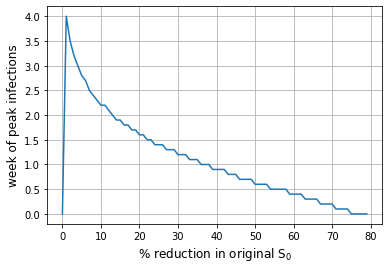

In [ ]:
N = 1000000
i0 = 3
T = 200
r = 3.5170
B = 3.9989
dt = 0.1


V = np.arange(0, 0.8, 0.01)
total = []
maxIndex = []

for v in V:
  S, I, tI, R, t_arr = SIR_vaccinated(N, i0, T, B, r, v, dt)
  total.append(total_infected(tI))
  maxIndex.append(peakIndex(I, dt))

# fig, ax = plt.subplots(1, 2, figsize = (12 , 6))
# fig.subplots_adjust(wspace=0.6)

# ax[0].plot(V, np.array(total)/N)
# ax[0].set_xlabel('Total Population', fontsize = 12)
# ax[0].set_ylabel('Total Infections', fontsize = 12)
# ax[0].grid()

# ax[1].plot(V, maxIndex)
# ax[1].set_xlabel('Total Population', fontsize = 12)
# ax[1].set_ylabel('Week of Peak infections', fontsize = 12)
# ax[1].grid()
# fig.show()

plt.plot(V*100, np.array(total)/N)
plt.xlabel('% reduction in original S$_0$', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.grid()
plt.savefig('b.png')

plt.figure()
plt.plot(V*100, maxIndex)
plt.xlabel('% reduction in original S$_0$', fontsize = 12)
plt.ylabel('week of peak infections', fontsize = 12)
plt.grid()
plt.savefig('b-time.png')

7.300000000000001
1.4000000000000001
0.9
0.4


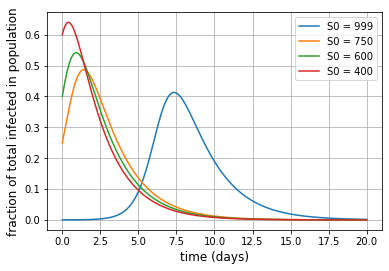

In [ ]:
N = 1000
i0 = 1
T = 20
B = 2
r = 0.5
dt = 0.1
v = 0.3

V = [0.0001, 0.25, 0.4, 0.6]
total = []
maxIndex = []
plt.figure()
for v in V:
  S, I, tI, R, t_arr = SIR_vaccinated(N, i0, T, B, r, v, dt)
  total.append(total_infected(tI))
  maxIndex.append(peakIndex(I, dt))
  plt.plot(t_arr, np.array(I)/N)
  print(peakIndex(I, dt))


plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.legend(['S0 = 999', 'S0 = 750', 'S0 = 600', 'S0 = 400'])
plt.grid()
plt.savefig('b.png')


### Problem C

In [ ]:
def SIR_vaccinated_each_day(N, i0, T, B, r, v_percent, dt, delay):

  BN = B/N
  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  S[0] = N-i0
  R[0] = 0
  I[0] = i0

  breakpt = -1;
  for i in range(1, len(t_arr)):

    if i*dt < delay:
      S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
    else:
      S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt - N*v_percent * dt

    if(S[i] <= 0):
      breakpt = i
      break
    
    I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - r * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1] * dt

  for i in range(breakpt, len(t_arr)):
    I[i] = I[i-1] - r * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1] * dt
    
  return S, I, R, t_arr

In [ ]:
def SIR_vaccinated_afficacy(N, i0, T, B, r, v_percent, dt, delay, mu):

  BN = B/N
  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  vac = 0 * t_arr
  S[0] = N-i0
  R[0] = 0
  I[0] = i0
  vac[0] = 0
  breakpt = -1;
  for i in range(1, len(t_arr)):
     
    if i*dt < delay:
      S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
    else:
      vac[i] = vac[i-1] + N * v_percent * dt - vac[i-1] * mu * dt
      S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt - N * v_percent * dt + vac[i-1] * mu * dt

    if(S[i] <= 0):
      breakpt = i
      break
    
    I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - r * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1] * dt

  for i in range(breakpt, len(t_arr)):
    I[i] = I[i-1] - r * I[i-1] * dt
    R[i] = R[i-1] + r * I[i-1] * dt
    
  return S, I, R, vac, t_arr

In [ ]:
def SIR_vaccine_special_case(N, i0, T, B, r, dt, delay):


    BN = B/N
    t_arr = np.arange(0, T+dt, dt)
    S = 0 * t_arr
    R = 0 * t_arr
    I = 0 * t_arr
    S[0] = N
    R[0] = 0
    I[0] = i0

    breakpt = -1;
    for i in range(1, len(t_arr)):

      if i*dt < delay:
        S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
      else:
        breakpt = i
        break
      
      I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - r * I[i-1] * dt
      R[i] = R[i-1] + r * I[i-1] * dt

    for i in range(breakpt, len(t_arr)):
      I[i] = I[i-1] - r * I[i-1] * dt
      R[i] = R[i-1] + r * I[i-1] * dt
      
    return S, I, R, t_arr


### Delay = 0

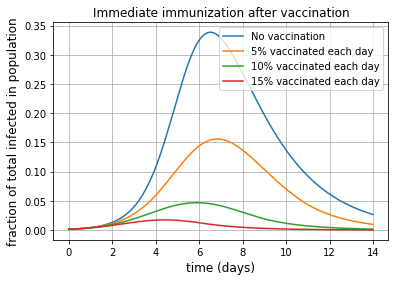

In [ ]:
# BASE CASE 0 delay
N = 763
i0 = 1
T = 14
r = 0.5
B = 0.00218
dt = 0.001
v_percent = [0.05, 0.1, 0.15]
delay = 0

legend_str = ['No vaccination']
S, I, tI, R, t_arr = SIR_base(N, i0, T, B*N, r, dt)
plt.plot(t_arr, I/N)

for v in v_percent:
  S, I, R, t_arr = SIR_vaccinated_each_day(N, i0, T, B*N, r, v, dt, delay)
  plt.plot(t_arr, I/N)
  legend_str.append(str(int(v*100)) + '% vaccinated each day')

plt.grid()
plt.legend(legend_str)
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.title('Immediate immunization after vaccination')
plt.savefig('c-0')
plt.show()

### Delay = 3 days

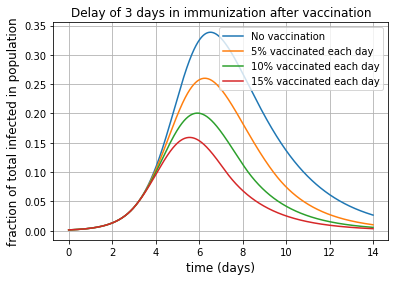

In [ ]:
# BASE CASE 3 delay
N = 763
i0 = 1
T = 14
r = 0.5
B = 0.00218
dt = 0.001
v_percent = [0.05, 0.1, 0.15]
delay = 3

legend_str = ['No vaccination']
S, I, tI, R, t_arr = SIR_base(N, i0, T, B*N, r, dt)
plt.plot(t_arr, I/N)

for v in v_percent:
  S, I, R, t_arr = SIR_vaccinated_each_day(N, i0, T, B*N, r, v, dt, delay)
  plt.plot(t_arr, I/N)
  legend_str.append(str(int(v*100)) + '% vaccinated each day')

plt.grid()
plt.legend(legend_str)
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.title('Delay of 3 days in immunization after vaccination')
plt.savefig('c-1')
plt.show()

#### Special Case i.e. Q3 in *Projects*



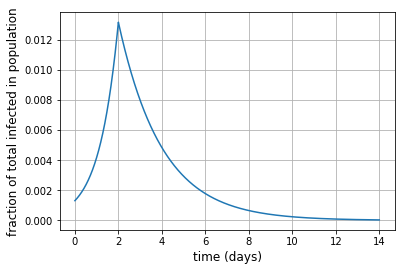

In [ ]:
N = 763
i0 = 1
T = 14
r = 0.5
B = 0.00218
dt = 0.001
v_percent = 0.15
delay = 2
S, I, R, t_arr = SIR_vaccine_special_case(N, i0, T, B*N, r, dt, delay)

plt.plot(t_arr, I/N)
plt.grid()
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.savefig('c-2')

### Problem - D
### Delay = 0 days and Afficacy = 95

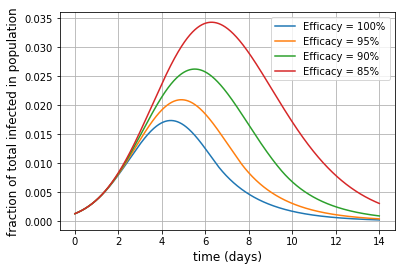

In [ ]:
# BASE CASE
N = 763
i0 = 1
T = 14
r = 0.5
B = 0.00218
dt = 0.001
v_percent = 0.15
mu = 0.05
delay = 0

S, I, R, t_arr = SIR_vaccinated_each_day(N, i0, T, B*N, r, v_percent, dt, delay)
plt.plot(t_arr, I/N)
S, I, R, vac, t_arr = SIR_vaccinated_afficacy(N, i0, T, B*N, r, v_percent, dt, delay, 0.05)
plt.plot(t_arr, I/N)
S, I, R, vac, t_arr = SIR_vaccinated_afficacy(N, i0, T, B*N, r, v_percent, dt, delay, 0.1)
plt.plot(t_arr, I/N)
S, I, R, vac, t_arr = SIR_vaccinated_afficacy(N, i0, T, B*N, r, v_percent, dt, delay, 0.15)
plt.plot(t_arr, I/N)

plt.legend(['Efficacy = 100%', 'Efficacy = 95%', 'Efficacy = 90%', 'Efficacy = 85%'])
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.grid()
plt.savefig('d')

### Problem E - Lockdown

In [ ]:
def SIR_lockdown(N, i0, T, B, x, effectiveness, dt, delay):

  BN = B/N
  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  tI = 0 * t_arr
  S[0] = N-i0
  R[0] = 0
  I[0] = i0
  tI[0] = i0

  flag = False
  breakpt = -1;
  for i in range(1, len(t_arr)):

    if i*dt >= delay and flag == False:
      flag = True
      BN = BN * (1 - effectiveness)
    
    S[i] = S[i-1] - BN * S[i-1] * I[i-1] * dt
    
    I[i] = I[i-1] + BN * S[i-1] * I[i-1] * dt - x * I[i-1] * dt
    tI[i] = BN * S[i-1] * I[i-1] * dt
    R[i] = R[i-1] + x * I[i-1] * dt

  #for i in range(breakpt, len(t_arr)):
  #  I[i] = I[i-1] - r * I[i-1] * dt
  #  R[i] = R[i-1] + r * I[i-1] * dt
    
  return S, I, tI, R, t_arr

1.1370201876599375


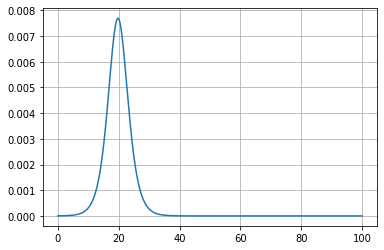

In [ ]:
N = 1055759
i0 = 3
T = 100
r = 3.5170
#r = 0.2843
B = 3.9989
dt = 0.1
effectiveness = 0.0
delay = 0
S, I, R, tI, t_arr = SIR_lockdown(N, i0, T, B, r, effectiveness, dt, delay)

print(B/r)
plt.plot(t_arr, I/N)
plt.grid()

### Varying effectiveness of lockdown with delay = 0

[728.2295448004579, 726.830807116113, 725.3674182274608, 723.8357213833575, 722.2317987719176, 720.5514486216579, 718.7901599936143, 716.9430850189437, 715.0050083124131, 712.9703132672271, 710.8329449109297, 708.5863689764747, 706.2235268183506, 703.7367857808127, 701.1178846087084, 698.3578734807141, 695.4470482459624, 692.3748784624291, 689.1299288759735, 685.6997740512716, 682.0709059821736, 678.2286346845603, 674.1569820279462, 669.8385694191666, 665.2545004417697, 660.3842402176657, 655.2054941380807, 649.6940897649874, 643.8238671937588, 637.5665850623534, 630.8918517635736, 623.7670943295648, 616.1575809581722, 608.0265172446068, 599.3352408032137, 590.0435439301093, 580.1101589132351, 569.493444939554, 558.1523183553859, 546.0474679855959, 533.1428925593361, 519.4077858865992, 504.81877493388066, 489.36248419834874, 473.03835546668506, 455.8615956505168, 437.8660603309763, 419.1068143171705, 399.662054809743, 379.634053345263, 359.1487866300924, 338.3539977000197, 317.41556293

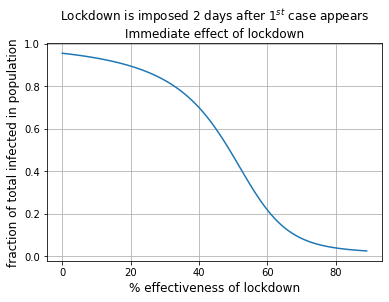

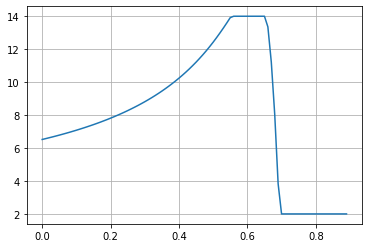

In [ ]:
N = 763
i0 = 1
T = 14
r = 0.5
B = 0.00218
dt = 0.001
v_percent = 0.15
delay = 2

# N = 1055759
# i0 = 3
# T = 100
# r = 3.5170
#r = 0.2843
# B = 3.9989
# dt = 0.01
effectiveness = np.arange(0, 0.9, 0.01)

total_inf = []
peak_index = []

for eff in effectiveness:
  S, I, tI, R, t_arr = SIR_lockdown(N, i0, T, B*N, r, eff, dt, delay)
  total_inf.append(total_infected(tI))
  peak_index.append(peakIndex(I, dt))


print(total_inf)
print(peak_index)
plt.plot(effectiveness*100, np.array(total_inf)/N)
plt.xlabel('% effectiveness of lockdown', fontsize = 12)
plt.ylabel('fraction of total infected in population', fontsize = 12)
plt.title('Lockdown is imposed 2 days after 1$^{st}$ case appears\nImmediate effect of lockdown')
plt.grid()
plt.savefig('e')

plt.figure()
plt.plot(effectiveness, peak_index)
# plt.plot(t_arr, R)
plt.grid()

### Problem F

In [ ]:
def SIR_lock_unlock(N, i0, T, B, x, effectiveness, dt, delay, gradient_length, lock_length):

  t_arr = np.arange(0, T+dt, dt)
  S = 0 * t_arr
  R = 0 * t_arr
  I = 0 * t_arr
  tI = 0 * t_arr
  S[0] = N-i0
  R[0] = 0
  I[0] = i0
  tI[0] = i0

  BN = 0 * t_arr
  BN[0] = B/N
  deaf = (effectiveness*BN[0])/gradient_length

  for i in range(1, len(BN)):
    if i*dt <= delay:
      BN[i] = BN[0]
    elif i*dt <= (delay + gradient_length):
      BN[i] = BN[i-1] - deaf * dt
    elif i*dt <= (delay + lock_length):
      BN[i] = BN[0] * (1 - effectiveness)
    elif i*dt <= (delay + lock_length + gradient_length):
      BN[i] = BN[i-1] + deaf*dt
    else:
      BN[i] = BN[0]

  # plt.plot(BN)

  flag = False
  breakpt = -1;
  for i in range(1, len(t_arr)):
    
    S[i] = S[i-1] - BN[i] * S[i-1] * I[i-1] * dt
    
    if I[i-1] < 0.01:
      breakpt = i
      break;

    I[i] = I[i-1] + BN[i] * S[i-1] * I[i-1] * dt - x * I[i-1] * dt
    tI[i] = BN[i] * S[i-1] * I[i-1] * dt
    R[i] = R[i-1] + x * I[i-1] * dt
    
  return S, I, tI, R, t_arr

In [ ]:
def make_graph_saxy(t_arr, I):
  label = ""
  off = 15
  for t,i in zip(t_arr,I):
    offsety = -off
    x = round(t,1)
    if x == delay:
      label = "Lock Start"
      plt.plot(t, i, '--bo')
      # print(label, ' = ', x, i)
    elif x == (delay + gradient_length):
      label = "Eff Achieved"
      plt.plot(t, i, '--bo')
      offsety = off
      # print(label, ' = ', x, i)
    elif x == (delay + lock_length):
      label = "Unlock Start"
      plt.plot(t, i, '--bo')
      offsety = -off
      # print(label, ' = ', x, i)
    elif x == (delay + lock_length + gradient_length):
      label = "Original BN"
      plt.plot(t, i, '--bo')
      offsety = off
      # print(label, ' = ', x, i)
    else:
      label = ""

    plt.annotate(label, # this is the text
                 (x,i), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,offsety), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

9.673662294965338


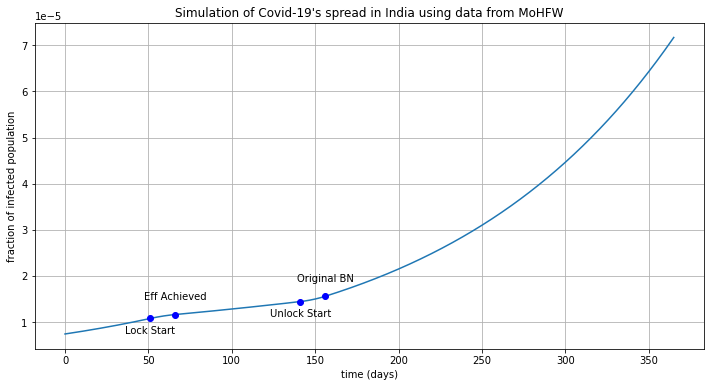

In [ ]:
N = 135000
i0 = 1
T = 365
r = 1/15
B = 1.11/15
dt = 0.1
effectiveness = 0.06
delay = 51
gradient_length = 15
lock_length = 90

S, I, R, tI, t_arr = SIR_lock_unlock(N, i0, T, B, r, effectiveness, dt, delay, gradient_length, lock_length)

print(I[(int(T/dt) - 1)])
plt.figure(figsize = (12,6))
plt.plot(t_arr, I/N)
plt.xlabel('time (days)')
plt.ylabel('fraction of infected population')
plt.title('Simulation of Covid-19\'s spread in India using data from MoHFW')
make_graph_saxy(t_arr, I/N)

plt.grid()
plt.savefig('covid.png')

## LAB5 PART 2

### Changing q Q5

0.0


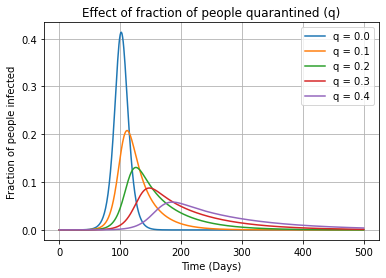

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k=10
b=0.06
p=1/5
v=0.04
m=0.0975
w=0.0625
u=1/10
n0=10000000
q1=[0.0, 0.1, 0.2, 0.3, 0.4]

dt=1
t=np.arange(0,501,dt)

print(k*b*(1-1)/(v+m+w))

plt.figure()

for q in q1:
    s=[10000000-10]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)

    #plt.plot(t,np.array(s)+np.array(sq))
    plt.plot(t,(np.array(e)+np.array(eq)+np.array(iu)+np.array(iq)+np.array(id))/n0)
    #plt.plot(t,r)
    #plt.plot(t,d)

plt.legend(['q = 0.0','q = 0.1','q = 0.2','q = 0.3','q = 0.4'])
plt.xlabel('Time (Days)')
plt.ylabel('Fraction of people infected')
plt.title('Effect of fraction of people quarantined (q)')
plt.grid()
plt.savefig('lq5.PNG')
plt.show()


### Changing k Q6

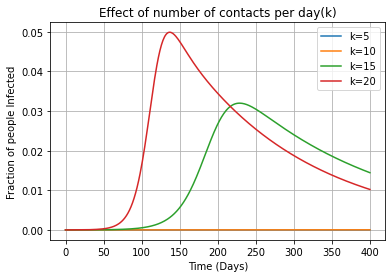

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k1=[5,10,15,20]
b=0.06
p=1/5
v=0.04
m=0.0975
w=0.0625
u=1/10
n0=10000000
q=0.65

dt=1
t=np.arange(0,401,dt)

plt.figure()

for k in k1:
    s=[10000000]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)
    
    plt.plot(t,(np.array(e)+np.array(eq)+np.array(iu)+np.array(iq)+np.array(id))/n0)

plt.legend(['k=5','k=10','k=15','k=20'])
plt.xlabel('Time (Days)')
plt.ylabel('Fraction of people Infected')
plt.title('Effect of number of contacts per day(k)')
plt.grid()
plt.savefig('lq6.PNG')
plt.show()


### Changing time of quarantine Q8

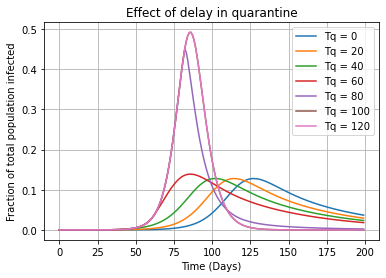

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k=10
b=0.06
p=1/5
v=0.04
m=0.0975
w=0
u=1/10
n0=10000000
q=0

dt=1
#t=np.arange(0,400,dt)
t=np.arange(0,200,dt)
tq1=np.arange(0,140,20)

s1=[]
i1=[]
r1=[]
d1=[]

plt.figure()

for tq in tq1:
    s=[10000000]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    q=0
    w=0
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)
        if(t[i]>=tq):
            q=0.2
            w=0.0675

    plt.plot(t,(np.array(e)+np.array(eq)+np.array(iu)+np.array(id)+np.array(iq))/n0)
    s1.append(s[-1]+sq[-1])
    i1.append(np.max(np.array(e)+np.array(eq)+np.array(iu)+np.array(iq)+np.array(id)))
    r1.append(r[-1])
    d1.append(d[-1])

#plt.plot(tq1,np.array(s1)/n0,tq1,np.array(i1)/n0,tq1,np.array(r1)/n0,tq1,np.array(d1)/n0)
plt.legend(['Tq = 0','Tq = 20','Tq = 40','Tq = 60','Tq = 80','Tq = 100','Tq = 120'])
plt.xlabel('Time (Days)')
plt.ylabel('Fraction of total population infected')
plt.title('Effect of delay in quarantine')
plt.grid()
plt.savefig('lq8.PNG')
plt.show()


### Changing w Q7

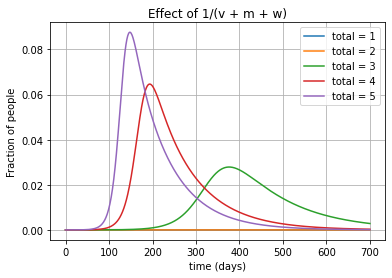

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k=10
b=0.06
p=1/5
v=0.04
m=0.0975
u=1/10
n0=10000000
q=0.3

dt=1
t=np.arange(0,701,dt)

s1=[]
i1=[]
r1=[]
d1=[]

day=np.arange(1,6,1);
plt.figure()
for tot in day:
    w=(1/tot)-m-v;
    s=[10000000-10]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)
    s1.append(s[-1])
    i1.append(np.max(np.array(e)+np.array(eq)+np.array(iu)+np.array(id)+np.array(iq)))
    r1.append(r[-1])
    d1.append(d[-1])
    plt.plot(t,(np.array(e)+np.array(eq)+np.array(iu)+np.array(iq)+np.array(id))/n0)
    
#plt.figure()
#plt.plot(day,np.array(s1)/n0,day,np.array(i1)/n0,day,np.array(r1)/n0,day,np.array(d1)/n0)
plt.legend(['total = 1','total = 2','total = 3','total = 4','total = 5'])
plt.xlabel('time (days)')
plt.ylabel('Fraction of people')
plt.title('Effect of 1/(v + m + w)')
plt.grid()
plt.savefig('lq7.PNG')
plt.show()


### Changing k

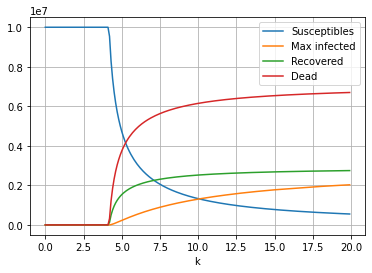

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k=10
b=0.06
p=1/5
v=0.04
m=0.0975
w=0.0625
u=1/10
n0=10000000
k1=np.arange(0,20,0.1)
q=0.2

dt=1
t=np.arange(0,10000,dt)

s1=[]
i1=[]
d1=[]
r1=[]

for k in k1:
    s=[10000000-10]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)
    
    s1.append(s[-1])
    i1.append(np.max(np.array(e)+np.array(eq)+np.array(iu)+np.array(id)+np.array(iq)))
    d1.append(d[-1])
    r1.append(r[-1])

plt.figure()
plt.plot(k1,s1,k1,i1,k1,r1,k1,d1)
plt.legend(['Susceptibles','Max infected','Recovered','Dead'])
plt.xlabel('k')
plt.grid()
plt.show()


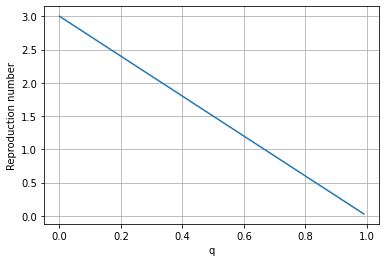

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

q=np.arange(0,1,0.01)
k=10
b=0.06
p=1/5
v=0.04
m=0.0975
w=0.0625
u=1/10
n0=10000000

r0=k*b*(1-q)/(v+m+w)

plt.figure()
plt.plot(q,r0)
plt.grid()
plt.xlabel('q')
plt.ylabel('Reproduction number')
plt.show()


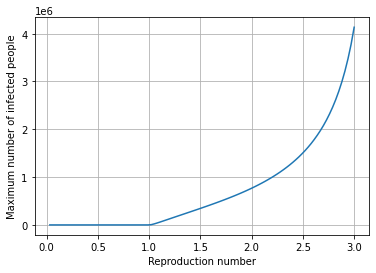

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

k=10
b=0.06
p=1/5
v=0.04
m=0.0975
w=0.0625
u=1/10
n0=10000000
q1=np.arange(0,1,0.01)

r0=k*b*(1-q1)/(v+m+w)

dt=1
t=np.arange(0,10000,dt)

ans=[]

for q in q1:
    s=[10000000-10]
    sq=[0]
    e=[0]
    eq=[0]
    iu=[10]
    iq=[0]
    id=[0]
    d=[0]
    r=[0]
    n=[10000000]
    for i in range(len(t)-1):
        s.append(s[i]+(u*sq[i]-k*b*(1-q)*s[i]*iu[i]/n[i]-k*(1-b)*q*s[i]*iu[i]/n[i]-k*b*q*s[i]*iu[i]/n[i])*dt)
        sq.append(sq[i]+(k*(1-b)*q*s[i]*iu[i]/n[i]-u*sq[i])*dt)
        e.append(e[i]+(k*b*(1-q)*s[i]*iu[i]/n[i]-p*e[i])*dt)
        eq.append(eq[i]+(k*b*q*s[i]*iu[i]/n[i]-p*eq[i])*dt)
        iu.append(iu[i]+(p*e[i]-(v+m+w)*iu[i])*dt)
        iq.append(iq[i]+(p*eq[i]-(v+m+w)*iq[i])*dt)
        id.append(id[i]+(w*(iu[i]+iq[i])-(v+m)*id[i])*dt)
        d.append(d[i]+(m*(iq[i]+iu[i]+id[i]))*dt)
        r.append(r[i]+(v*(iq[i]+iu[i]+id[i]))*dt)
        n.append(n[i]+(-m*(iq[i]+iu[i]+id[i]))*dt)
    
    ans.append(np.max(np.array(e)+np.array(eq)+np.array(iu)+np.array(iq)+np.array(id)))

plt.figure()
plt.plot(r0,ans)
plt.xlabel('Reproduction number')
plt.ylabel('Maximum number of infected people')
plt.grid()
plt.show()


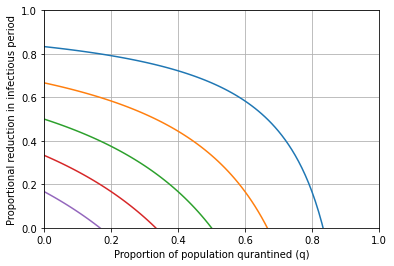

In [ ]:
R = 3

q = np.linspace(0, 0.99,100);
Rint = np.linspace(0.5,2.5,5);

for z in Rint :
  Y = []

  for x in q : 
    Y.append(1 - z/(R*(1 - x)))
  plt.plot(q,Y, label=str(z))

  q_max = np.amax(Y)
  
plt.grid()  
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Proportional reduction in infectious period')
plt.xlabel('Proportion of population qurantined (q)')
plt.savefig('p2c.PNG')